In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("supermarket_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


#### Question 1: Example

In [3]:
### how many purchases (rows in the table, not 'Quantity') were done by Male and Female customers?

#### Question 1 - solution: Example

In [4]:
m_amount = len(df[df['Gender'] == 'Male'])
f_amount = len(df[df['Gender'] == 'Female'])

# do not print any intermediate results
# print *only your final* result in the form of a data frame (for clarity)

result = [('purchases by male', m_amount), ('purchases by female', f_amount)]
pd.DataFrame(result)

,0,1
0,purchases by male,498
1,purchases by female,502


#### Question 2

In [5]:
### what is the average Rating for products in the "Home and lifestyle" Product line?

In [6]:
avg_home_lifestyle_rating = df[df['Product line'] == 'Home and lifestyle']['Rating'].mean() # calculate the average rating for products in the "Home and lifestyle" Product line
result = [ ('Home and lifestyle average rating', avg_home_lifestyle_rating)] # create a data frame with the result
pd.DataFrame(result)

,0,1
0,Home and lifestyle average rating,6.8375


#### Question 3

In [7]:
### how many products in each Product line were sold during the first week (days 1-7 including) of February 2019?
### use the 'Quantity' column for that purpose - the number of products purchased

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y", errors='coerce') # convert the 'Date' column to datetime format

In [9]:
# condition to select rows with the first week of February 2019
cond_1st_week = (df['Date'].dt.day >= 1) & (df['Date'].dt.day <= 7)
cond_feb = df['Date'].dt.month == 2
cond_2019 = df['Date'].dt.year == 2019

product_and_quantity = pd.DataFrame(df[cond_1st_week & cond_feb & cond_2019].groupby('Product line')['Quantity'].sum().reset_index()) # calculate the number of products sold in each Product line during the first week
product_and_quantity


,Product line,Quantity
0,Electronic accessories,92
1,Fashion accessories,67
2,Food and beverages,132
3,Health and beauty,78
4,Home and lifestyle,87
5,Sports and travel,54


#### Question 4

In [10]:
### plot a bar chart showing the number of products per category computed in the previous question

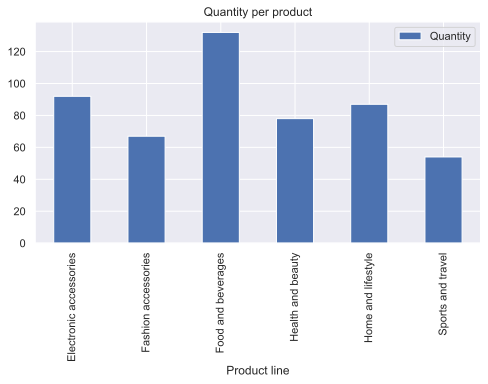

In [11]:
product_and_quantity.plot(kind='bar', x='Product line', y='Quantity', title  = 'Quantity per product')
plt.show()

#### Question 5

In [12]:
### plot the same bar chart as above - split by gender (male, female)
### the split bar chart is called stacked bar: look up "plot stacked bar charts from a dataframe" to see how to plot it

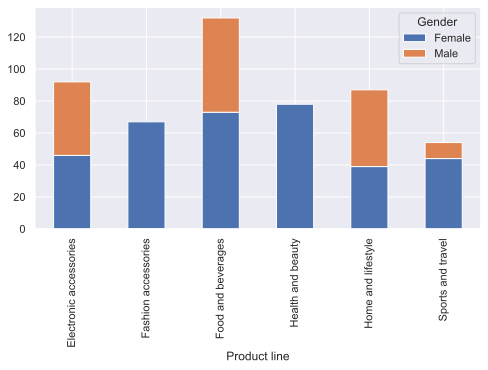

In [13]:
# create a new dataframe with the number of products sold in each Product line by Gender during the first week of February 2019
feb_1st_week_quanity_by_gender = df[cond_1st_week & cond_feb & cond_2019].groupby(['Product line', 'Gender'])['Quantity'].sum().unstack()
feb_1st_week_quanity_by_gender.reset_index()
feb_1st_week_quanity_by_gender.plot(kind='bar', stacked=True)
plt.show()

#### Question 6

In [14]:
### what is the total sales ('Total') done by each Payment type during the whole period?
### use the full data in the dataset (not the first week of March) from now on

In [15]:
df.groupby('Payment')['Total'].sum().reset_index()

,Payment,Total
0,Cash,112206.570
1,Credit card,100767.072
2,Ewallet,109993.107


#### Question 7

In [16]:
### plot a chart with total sales ('Total') of the "Sports and travel" products by calendar week (Monday-Sunday): 
### note the first and the last week can be incomplete (for instance, the data starts on Wednesday, and ends on Friday)
### assume all our sales data spans the same year (for instance, 2019)

### you can make use of the isocalendar() function: https://www.geeksforgeeks.org/isocalendar-function-of-datetime-date-class-in-python/

### x axis are weeks enumerated from the first to the last calendar week in the data
### y axis is the total sales that week

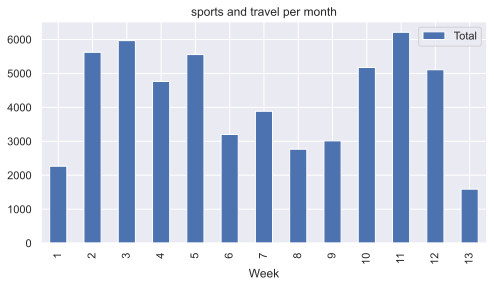

In [17]:
df['Week'] = df['Date'].dt.isocalendar().week # get the week number of the year
df_sports = df[df['Product line'] == 'Sports and travel'] # filter the dataframe to include only the "Sports and travel" products
df_sports
sports_by_week = df_sports.groupby('Week')['Total'].sum().reset_index() # group the dataframe by week and sum the total sales for each week
sports_by_week.plot(kind='bar', x='Week', y='Total', title  = 'sports and travel per month')
plt.show()

#### Question 8

In [18]:
### plot a line chart of total sales ('Total') per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total amout of sales during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

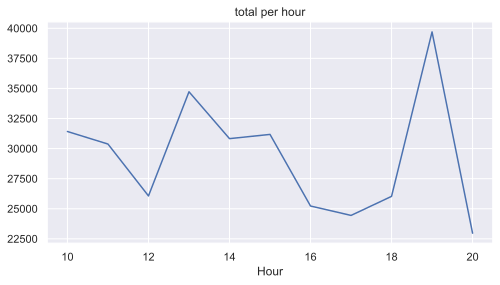

In [19]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M') # convert the 'Time' column to datetime format
df['Hour'] = df['Time'].dt.hour # extract the hour from the 'Time' column
total_per_hour = df.groupby('Hour')['Total'].sum() # group the dataframe by hour and sum the total sales for each hour
total_per_hour.plot(kind='line', x='Hour', y='Total', title  = 'total per hour')
plt.show()

#### Question 9

In [20]:
### plot a line chart of the total number of purchases (rows) per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total number of purchases during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

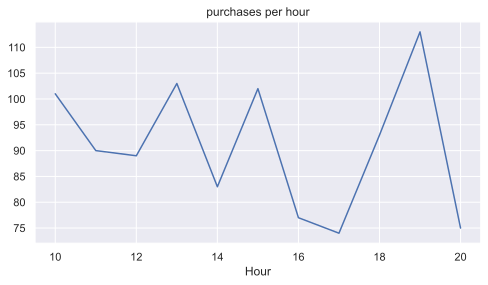

In [21]:
purchases_per_hour = df.groupby('Hour').size()
purchases_per_hour.plot(kind='line', x='Hour', y='purchases', title  = 'purchases per hour')
plt.show()

#### Question 10

In [22]:
### what is the total income of strategic products by City?

### for each non-strategic product (as detailed in the product_types_strategy.csv file), 
###    display break down of total sales by cities - a table with three columns: 
###    (1) product line, (2) city and (3) total sales (the "Total" column) for that line in the city

In [23]:
str_data = pd.read_csv("product_types_strategy.csv")
cond_str = str_data[str_data['strategic'] == 'yes'] # filter the dataframe to include only the strategic products
str_list = cond_str['Product type'].tolist() # create a list of strategic products
cond_strategic = df[df['Product line'].isin(str_list)] # filter the dataframe to include only the strategic products
pd.DataFrame([('Total startegic income' , cond_strategic['Total'].sum())]) # calculate the total income of strategic products

,0,1
0,Total startegic income,214798.941


In [24]:
cond_strategic_no = df[~df['Product line'].isin(str_list)] # filter the dataframe to include only the non-strategic products
pd.DataFrame(cond_strategic_no.groupby(['Product line','City'])['Total'].sum()) # calculate the total sales of non-strategic products by city

Total
Product line        City                 
Fashion accessories Mandalay   16413.3165
                    Naypyitaw  21560.0700
                    Yangon     16332.5085
Home and lifestyle  Mandalay   17549.1645
                    Naypyitaw  13895.5530
                    Yangon     22417.1955